<a href="https://colab.research.google.com/github/hderoche/RNN_Bitcoin_Prediction/blob/master/StatistiquesDescriptivesBTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistiques descriptives sur l'historique du Bitcoin**

---




In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Importer les données

In [26]:
# dataBtc = pd.read_csv('data_btc.csv', header=0)
# dataBTC = pd.read_csv('price_btc_1h.csv', header=0, sep=',')
#dataBitstamp = pd.read_csv('Bitstamp_BTCUSD_1h.csv', header=0, sep=';')
dataBitstamp = pd.read_csv('Bitstamp_BTCUSD_d.csv', header=0, sep=';')
# This dataset has a column of Timstamp
print('Nom des colonnes :',dataBitstamp.columns)

### Drop du timestamp
#dataBitstamp = dataBitstamp.drop(['Unix Timestamp'], axis=1)
dataBitstamp = dataBitstamp.drop(['unix'], axis=1)


# Data processing and slicing dataframe in order to have the right dimension to input in the RNN
data = pd.DataFrame(dataBitstamp, index=[i for i in range(dataBitstamp.shape[0])])
# The datafiles I had were reversed, meaning that the index of the lastest data was 0, so I had to reverse the dataframe
data = data[::-1]
#data = data.drop(['Date','Symbol', 'Volume USD'], axis=1)
data = data.drop(['date','symbol', 'Volume USD'], axis=1)
print(data.shape)
print(data.head())


Nom des colonnes : Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')
(2221, 5)
        open    high     low   close  Volume BTC
2220  363.59  381.34  360.57  376.28  3220878.18
2219  376.42  386.60  372.25  376.72  2746157.05
2218  376.57  381.99  373.32  373.34  1145566.61
2217  376.40  382.31  373.03  378.39  2520662.37
2216  378.39  382.86  375.23  379.25  2593576.46


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Indicateurs

In [27]:
def moving_average(data, param):
  data['MA' + str(param)] = data.iloc[:,3].rolling(window=param).mean()
  data = data[::-1]
  return data

def exponential_moving_average(data, param):
  data['EMA' + str(param)] = data.iloc[:, 3].ewm(span=param).mean()
  data = data[::-1]
  return data

print(moving_average(data, 200))
print(exponential_moving_average(data, 13)['EMA13'])

          open      high       low     close    Volume BTC        MA200
0     24714.01  24768.79  24532.28  24614.77  6.601946e+01  12922.98545
1     23747.22  24777.00  23403.82  24705.15  6.469229e+03  12848.79580
2     23215.00  23779.14  22700.10  23726.28  7.185482e+03  12774.18505
3     23819.08  24096.90  22624.92  23247.71  1.154197e+04  12704.30385
4     22750.07  23843.21  22383.59  23835.10  9.367609e+03  12636.41455
...        ...       ...       ...       ...           ...          ...
2216    378.39    382.86    375.23    379.25  2.593576e+06          NaN
2217    376.40    382.31    373.03    378.39  2.520662e+06          NaN
2218    376.57    381.99    373.32    373.34  1.145567e+06          NaN
2219    376.42    386.60    372.25    376.72  2.746157e+06          NaN
2220    363.59    381.34    360.57    376.28  3.220878e+06          NaN

[2221 rows x 6 columns]
0       22838.670777
1       22542.654240
2       22182.238280
3       21924.897993
4       21704.429326
      

### Volatilité et Volume (Correlation)

In [28]:
def volatility_max():
  data['vol'] = data['high'].sub(data['low'], axis=0)
  print(data.head())
volatility_max()

        open    high     low   close  Volume BTC  MA200       EMA13    vol
2220  363.59  381.34  360.57  376.28  3220878.18    NaN  376.280000  20.77
2219  376.42  386.60  372.25  376.72  2746157.05    NaN  376.516923  14.35
2218  376.57  381.99  373.32  373.34  1145566.61    NaN  375.291181   8.67
2217  376.40  382.31  373.03  378.39  2520662.37    NaN  376.253077   9.28
2216  378.39  382.86  375.23  379.25  2593576.46    NaN  377.049845   7.63


In [29]:
# Pre-processing for display
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

dataN = normalize(data)
dfCorrelationN = pd.DataFrame()
dfCorrelationN['volumeBTC'] = dataN['Volume BTC']
dfCorrelationN['volatility'] = dataN['vol']
print(dfCorrelationN.head())
print(dfCorrelationN.corr())

      volumeBTC  volatility
2220   0.004170    0.004480
2219   0.003556    0.003096
2218   0.001483    0.001870
2217   0.003264    0.002002
2216   0.003358    0.001646
            volumeBTC  volatility
volumeBTC    1.000000    0.612587
volatility   0.612587    1.000000


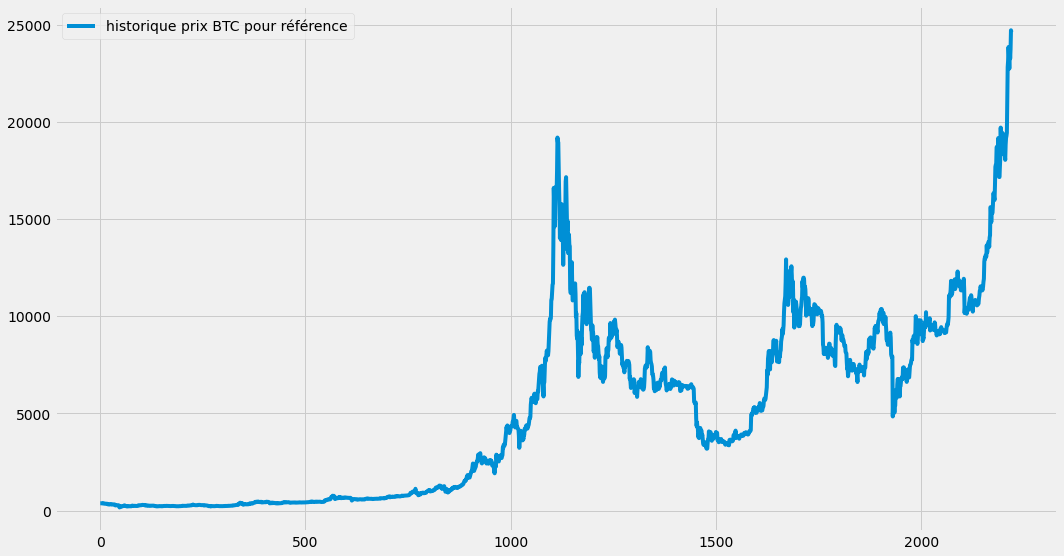

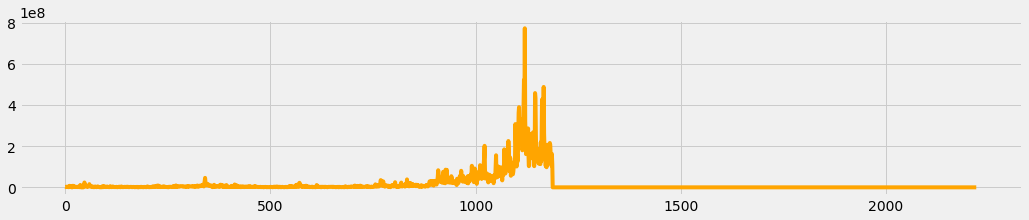

In [30]:
plt.figure(figsize=[16,9])
dataTemp = data.reset_index()
plt.plot(dataTemp['close'], label='historique prix BTC pour référence')
plt.legend()
plt.figure(figsize=[16,3])
plt.plot(dataTemp['Volume BTC'], color="orange")
plt.show()

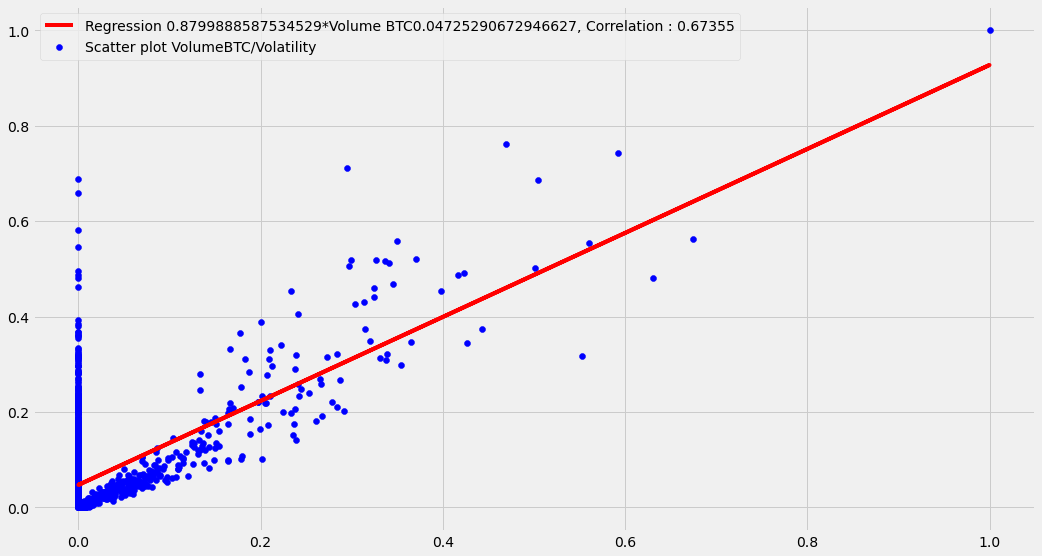

In [31]:
plt.figure(figsize=[16,9])
plt.scatter(dfCorrelationN['volumeBTC'], dfCorrelationN['volatility'], color='blue', label='Scatter plot VolumeBTC/Volatility')
m, b = np.polyfit(dfCorrelationN['volumeBTC'], dfCorrelationN['volatility'], 1)
plt.plot(dfCorrelationN['volumeBTC'], m*dfCorrelationN['volumeBTC'] + b, color='red', label='Regression ' + str(m) + '*Volume BTC'+ str(b) + ', Correlation : 0.67355')
plt.legend()
plt.show()

          open      high       low  ...  MA200     EMA13       vol
2220  0.008211  0.006860  0.008539  ...    NaN  0.006690  0.004480
2219  0.008733  0.007074  0.009018  ...    NaN  0.006701  0.003096
2218  0.008739  0.006886  0.009062  ...    NaN  0.006647  0.001870
2217  0.008732  0.006899  0.009050  ...    NaN  0.006689  0.002002
2216  0.008814  0.006921  0.009140  ...    NaN  0.006724  0.001646

[5 rows x 8 columns]
   index      open      high  ...     MA200     EMA13       vol
0      0  1.000000  0.999666  ...  1.000000  1.000000  0.051019
1      1  0.960623  1.000000  ...  0.994148  0.986910  0.296220
2      2  0.938946  0.959377  ...  0.988263  0.970972  0.232768
3      3  0.963550  0.972313  ...  0.982750  0.959592  0.317533
4      4  0.920009  0.961986  ...  0.977395  0.949843  0.314866

[5 rows x 9 columns]


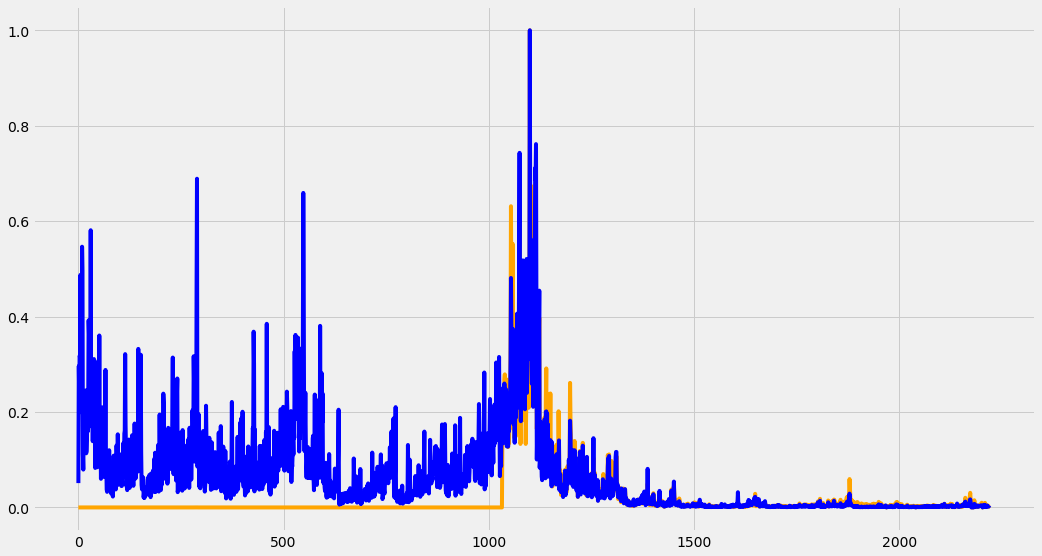

In [32]:
# removing noisy data

print(dataN.head())
dataN = dataN[::-1].reset_index()
print(dataN.head())
plt.figure(figsize=[16,9])
plt.plot(dataN['Volume BTC'], color='orange')
plt.plot(dataN['vol'], color='blue')
plt.plot()
plt.show()

### Moyenne des pourcentages volatilité

In [33]:
# Nomalisation

data['diff'] = data['close'] - data['open']
data['per'] = ( data['diff']*100 )/data['open']
dataNorm = normalize(data)
print(data.head())
print(dataNorm.head())
meanVolatilityPercentage = data['per'].mean()
minVolatilityPercentage = data['per'].min()
maxVolatilityPercentage = data['per'].max()
print('mean',meanVolatilityPercentage)
print('max',maxVolatilityPercentage)
print('min',minVolatilityPercentage)

        open    high     low   close  ...       EMA13    vol   diff       per
2220  363.59  381.34  360.57  376.28  ...  376.280000  20.77  12.69  3.490195
2219  376.42  386.60  372.25  376.72  ...  376.516923  14.35   0.30  0.079698
2218  376.57  381.99  373.32  373.34  ...  375.291181   8.67  -3.23 -0.857742
2217  376.40  382.31  373.03  378.39  ...  376.253077   9.28   1.99  0.528693
2216  378.39  382.86  375.23  379.25  ...  377.049845   7.63   0.86  0.227279

[5 rows x 10 columns]
          open      high       low  ...       vol      diff       per
2220  0.008211  0.006860  0.008539  ...  0.004480  0.513422  0.626628
2219  0.008733  0.007074  0.009018  ...  0.003096  0.511388  0.576504
2218  0.008739  0.006886  0.009062  ...  0.001870  0.510808  0.562727
2217  0.008732  0.006899  0.009050  ...  0.002002  0.511665  0.583103
2216  0.008814  0.006921  0.009140  ...  0.001646  0.511480  0.578673

[5 rows x 10 columns]
mean 0.26124685072043163
max 28.895061728395063
min -39.1466374403